In [88]:
import pandas as pd #import pandas library
import seaborn as sns #import seaborn library used for data visualization and plotting
import matplotlib.pyplot as plt #import matplotlib library that seaborn builds on for plotting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #import train_test_split function from sklearn library to split data into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score #import mean_squared_error and r2_score from sklearn library to evaluate the model performance

In [89]:
df = pd.read_csv("/Users/rithwik.chandrasekaran/AmesHousingMarket/AmesHousing.csv") #read the csv file into a pandas dataframe
df['TotalSQFT'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF'] #creates a new column TotalSQFT by adding three columns together
df['HouseAge'] = 2023 - df['Year Built'] 
df['IsRemodeled'] = (df['Year Remod/Add'] > df['Year Built']).astype(int) #1 if remod, 0 if not
df['RemodAge'] = (df['Year Remod/Add'] - df['Year Built']) * df['IsRemodeled'] #calculates the age of the remodel, makes 0 if not remodeled
df['TotalBath'] = df['Full Bath'] + df['Half Bath'] * 0.5 + df['Bsmt Full Bath'] + df['Bsmt Half Bath'] * 0.5 #creates a new column TotalBath by adding Full Bath, Half Bath, Bsmt Full Bath, and Bsmt Half Bath together
df['TotalPorchSF'] = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch'] #creates a new column TotalPorchSF by adding Open Porch SF, Enclosed Porch, 3Ssn Porch, and Screen Porch together

In [90]:
new_features = ['TotalSQFT', 'House Age', 'Garage Area', 'TotalBath'] #list of new features created
correlations = df[new_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False) #calculates the correlation of new features with Sale Price and sorts them in descending order
print(correlations) #prints the correlation of new features with Sale Price

SalePrice      1.000000
TotalSQFT      0.793024
Garage Area    0.640401
TotalBath      0.635694
House Age     -0.558426
Name: SalePrice, dtype: float64


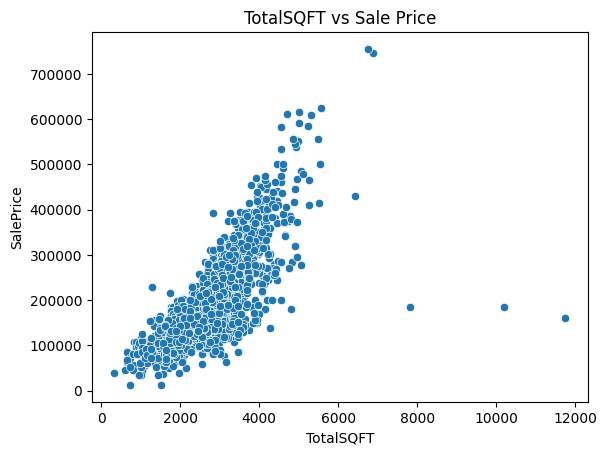

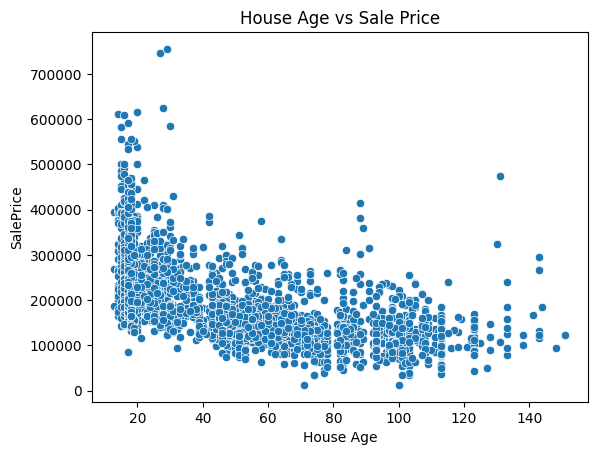

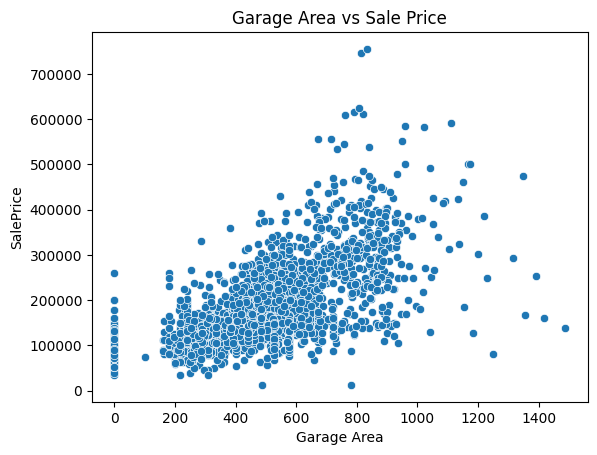

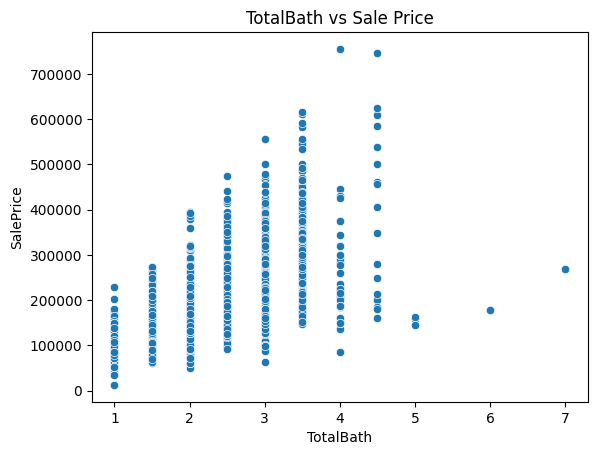

In [91]:
for feature in new_features: #iterates through each feature in new_features
    sns.scatterplot(data=df, x=feature, y='SalePrice')  #creates a scatter plot of each feature against Sale Price
    plt.title(f"{feature} vs Sale Price")  #sets the title of the plot
    plt.show() #displays the plot '''

In [92]:
model_x = df[new_features] #creates a new dataframe model_x with the new features
model_y = df['SalePrice'] #creates a new dataframe model_y with Sale Price

In [93]:
X_train, X_test, y_train, y_test = train_test_split( #splits the data into training and testing sets
    model_x,
    model_y,
    test_size=0.2,
    random_state=42
) #splits the data into training and testing sets, 80% training and 20% testing

In [94]:
print(X_train)
print(X_test)
test_medians = X_test.median(numeric_only=True)
train_medians = X_train.median(numeric_only=True)
X_train = X_train.fillna(train_medians)
X_test = X_test.fillna(test_medians)

      TotalSQFT  House Age  Garage Area  TotalBath
381      2460.0         47        479.0        2.0
834      3139.0         56        538.0        3.0
1898     1224.0         61        462.0        2.0
678      1040.0         74        420.0        2.0
700      2301.0        103          0.0        2.0
...         ...        ...          ...        ...
1638     2524.0         54        828.0        2.5
1095     2121.0         21        403.0        2.5
1130     2592.0         20        673.0        2.5
1294     2676.0        103        225.0        1.0
860      1536.0         51        396.0        1.5

[2344 rows x 4 columns]
      TotalSQFT  House Age  Garage Area  TotalBath
1357     2254.0         98        228.0        1.0
2367     1524.0         51        264.0        1.5
2822     2520.0         20        616.0        2.5
2126     1980.0         29          0.0        2.0
1544     1813.0         97        195.0        2.0
...         ...        ...          ...        ...
2268  

In [95]:
model = LinearRegression() #creates a linear regression model
model.fit(X_train, y_train) #fits the model to the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
import joblib
joblib.dump(model, "house_price_model.pkl")

['house_price_model.pkl']

In [97]:
y_pred = model.predict(X_test) #predicts Sale Price for the testing data
rmse = mean_squared_error(y_test, y_pred) ** 0.5 #calculates root mean squared error, 
#rmse is a measure of how well the model predicts Sale Price
r2 = r2_score(y_test, y_pred) #calculates r^2, indicates how well the model explains the variance in Sale Price
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)
print(df['SalePrice'].mean())

Root Mean Squared Error (RMSE): 43888.86948318957
R-squared Score: 0.7597478828799022
180796.0600682594


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
